In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/'
ddir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"

In [3]:
data2024august = ert.load(ddir + '16Aug/k38_old_125cm_flipped.dat')
#data2024june = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_125cm_topo.Dat')
#data2023 = ert.load(dir + 'mehriban/10_Aug_KamikF38/res2dinv_inputs/WS_rec_ele_nogps_noerror.Dat')
data2024june = ert.load(ddir+ '16Aug/k38_old_125cm_2024jun.txt')
data2023 = ert.load(ddir+'16Aug/k38_old_125cm_2023aug.txt')
data2024_long = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_250cm.Dat')
kamik = [data2023, data2024june, data2024august]

11/02/25 - 09:34:23 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [4]:
def geom_error(data):
    # Set sensor positions
    #data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
    data.remove(data['rhoa'] < 0)
    data['k'] = ert.createGeometricFactors(data, numerical=True)
    mgr = ert.ERTManager(sr=False)
    k0 = ert.createGeometricFactors(data)
    ert.showData(data, vals=k0/data['k'], label='Topography effect')
    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    data.remove(data['err'] > 0.06)
    #ert.show(data, data['err'])


    return data, mgr, k0


11/02/25 - 09:34:37 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\1996100753945848742
11/02/25 - 09:34:37 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4830894157490977068
11/02/25 - 09:34:39 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (3.2s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3665239150159996459
11/02/25 - 09:34:40 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\py

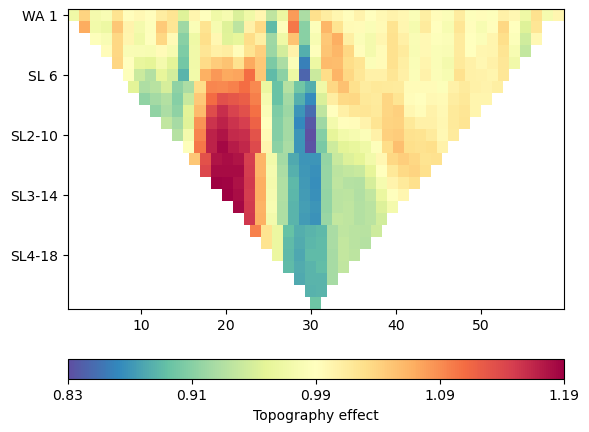

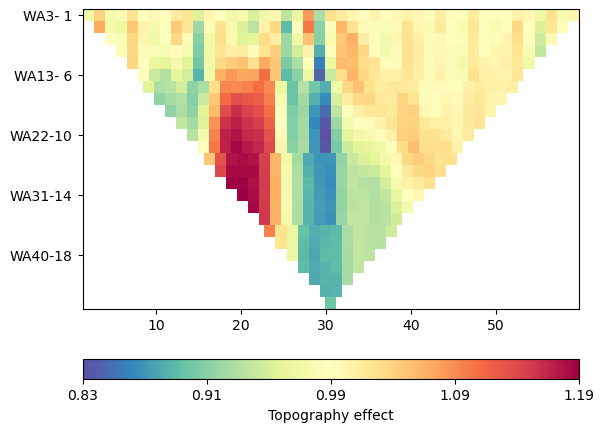

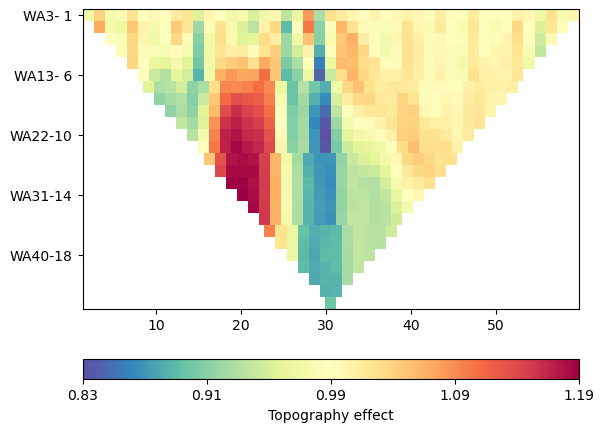

In [5]:

for item in kamik:
 geom_error(item)

#kamik[2].remove(kamik[2]['rhoa'] < 0)
#kamik[2]['k'] = ert.createGeometricFactors(kamik[2], numerical=True)
#mgr = ert.ERTManager(sr=False)
#k0 = ert.createGeometricFactors(kamik[2])
#ert.showData(kamik[2], vals=k0/kamik[2]['k'], label='Topography effect')
#kamik[2]['err'] = ert.estimateError(kamik[2], relativeError=0.03, absoluteUError=5e-5)

#ert.show(kamik[2], kamik[2]['err'])


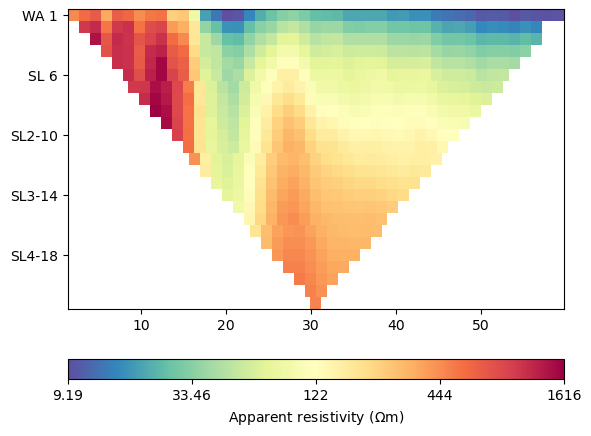

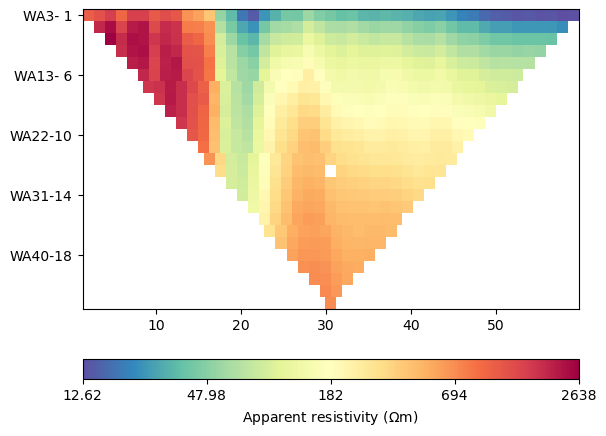

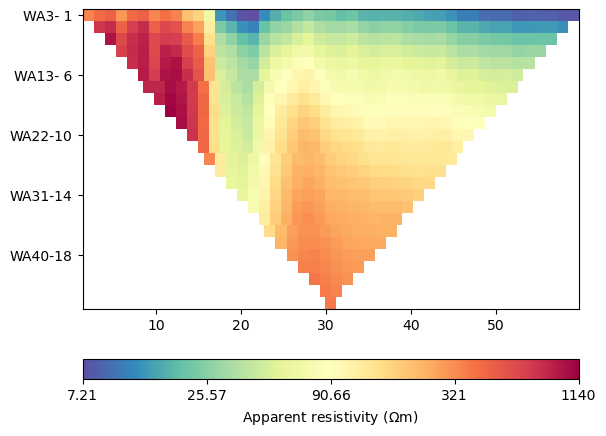

In [6]:
for item in kamik:
    ert.showData(item)

17/02/25 - 11:55:31 - pyGIMLi - INFO - Found 2 regions.
17/02/25 - 11:55:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/02/25 - 11:55:31 - pyGIMLi - INFO - Found 2 regions.
17/02/25 - 11:55:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/02/25 - 11:55:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/02/25 - 11:55:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/02/25 - 11:55:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2710 Cells: 5068 Boundaries: 3976
17/02/25 - 11:55:31 - pyGIMLi - INFO - Use median(data values)=124.4685
17/02/25 - 11:55:31 - pyGIMLi - INFO - Created startmodel from forward operator: 1001, min/max=124.468500/124.468500
17/02/25 - 11:55:31 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E3A7A0860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E1AF16D90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E2C1B6420>
min/max (data): 9.19/1616
min/max (error): 3%/3.21%
min/max (start model): 124/124
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1400.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  168.83 (dPhi = 87.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  102.84 (dPhi = 38.92%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   55.81 (dPhi = 44.76%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.03 (dPhi = 90.13%) lam: 2

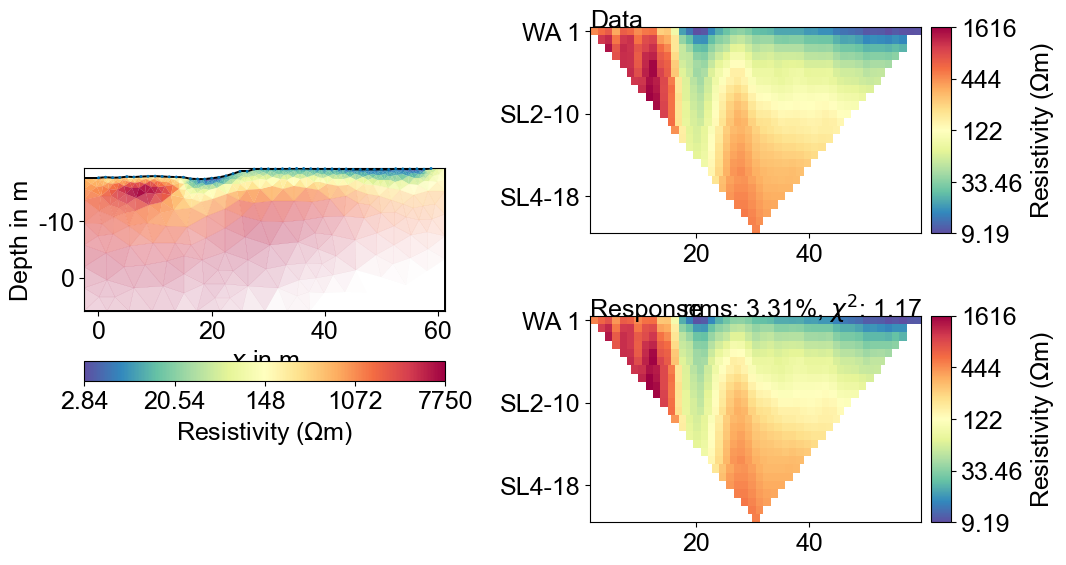

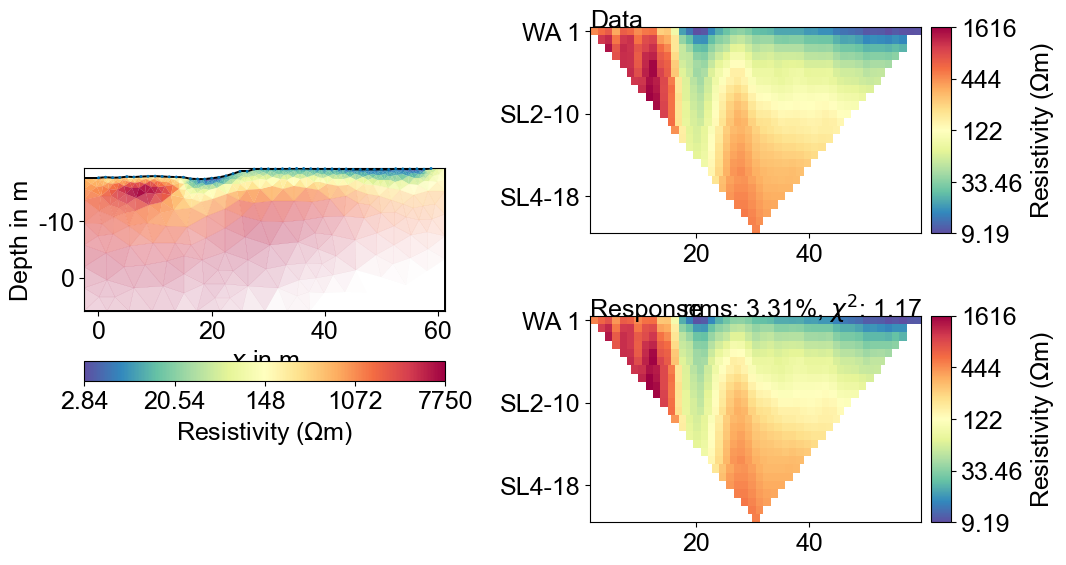

In [309]:
mgr = ert.ERTManager(kamik[0])
mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5, paraMaxCellSize=10)
mgr.showResultAndFit()

13/02/25 - 08:32:33 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

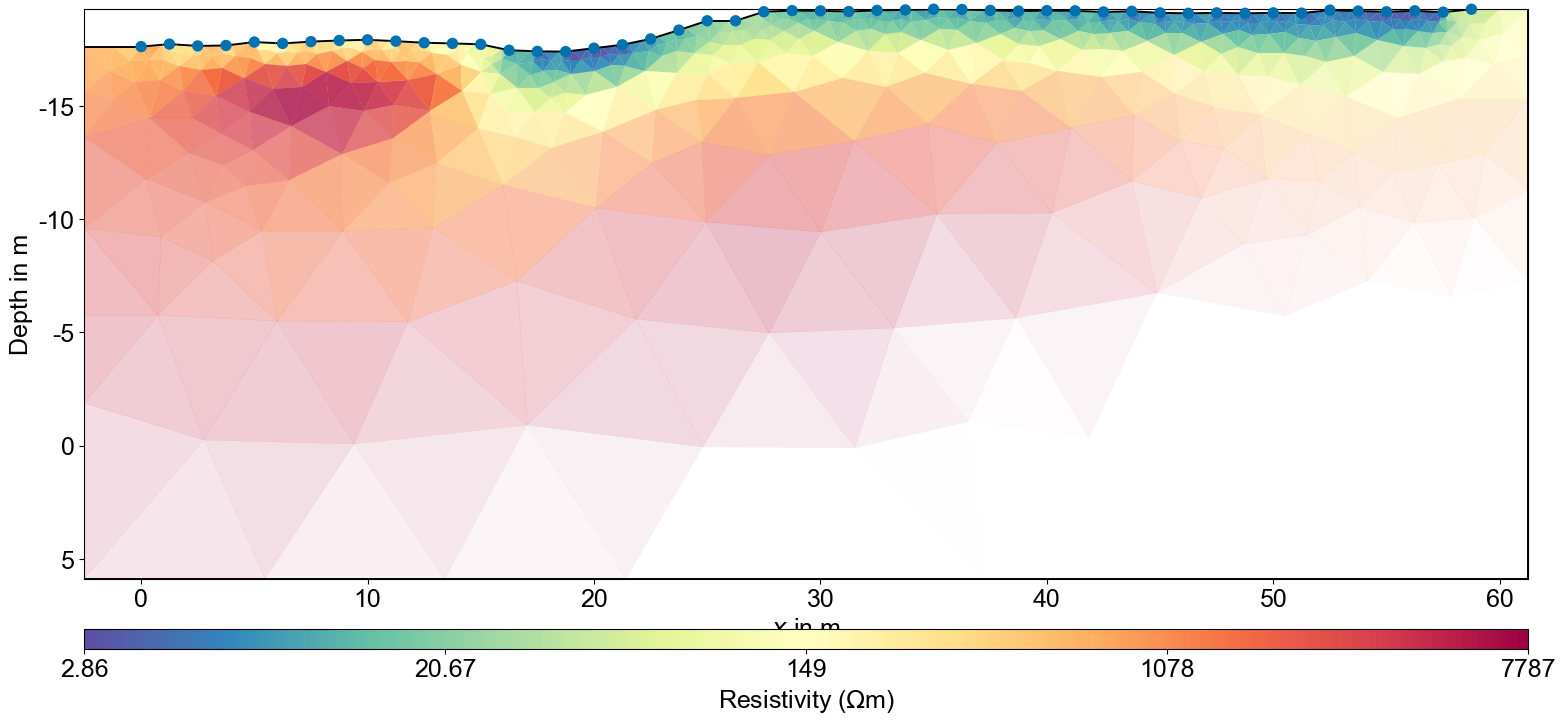

In [197]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2023')

13/02/25 - 08:32:51 - pyGIMLi - INFO - Found 2 regions.


13/02/25 - 08:32:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/02/25 - 08:32:51 - pyGIMLi - INFO - Found 2 regions.
13/02/25 - 08:32:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/02/25 - 08:32:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/02/25 - 08:32:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/02/25 - 08:32:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2393 Cells: 4440 Boundaries: 3502
13/02/25 - 08:32:52 - pyGIMLi - INFO - Use median(data values)=200.375
13/02/25 - 08:32:52 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=200.375000/200.375000
13/02/25 - 08:32:52 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E34646700>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E4A7B3470>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E45697DF0>
min/max (data): 12.62/2638
min/max (error): 3%/3.16%
min/max (start model): 200/200
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1486.87
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  178.62 (dPhi = 87.79%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  100.22 (dPhi = 43.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   25.80 (dPhi = 72.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.04 (dPhi = 83.25%) lam: 

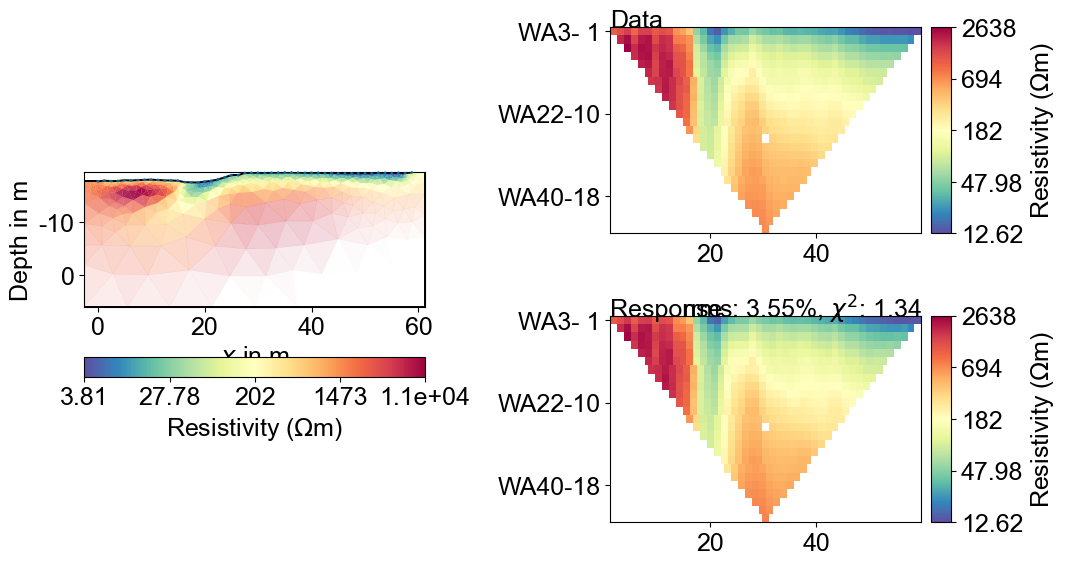

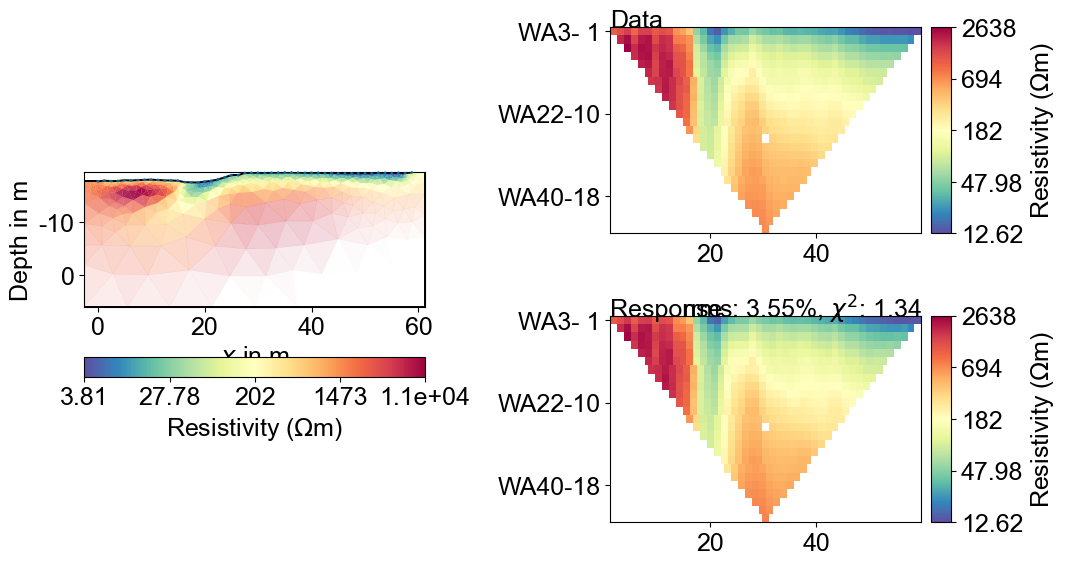

In [198]:
mgr = ert.ERTManager(item)
mgr.invert(kamik[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()


13/02/25 - 08:34:26 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

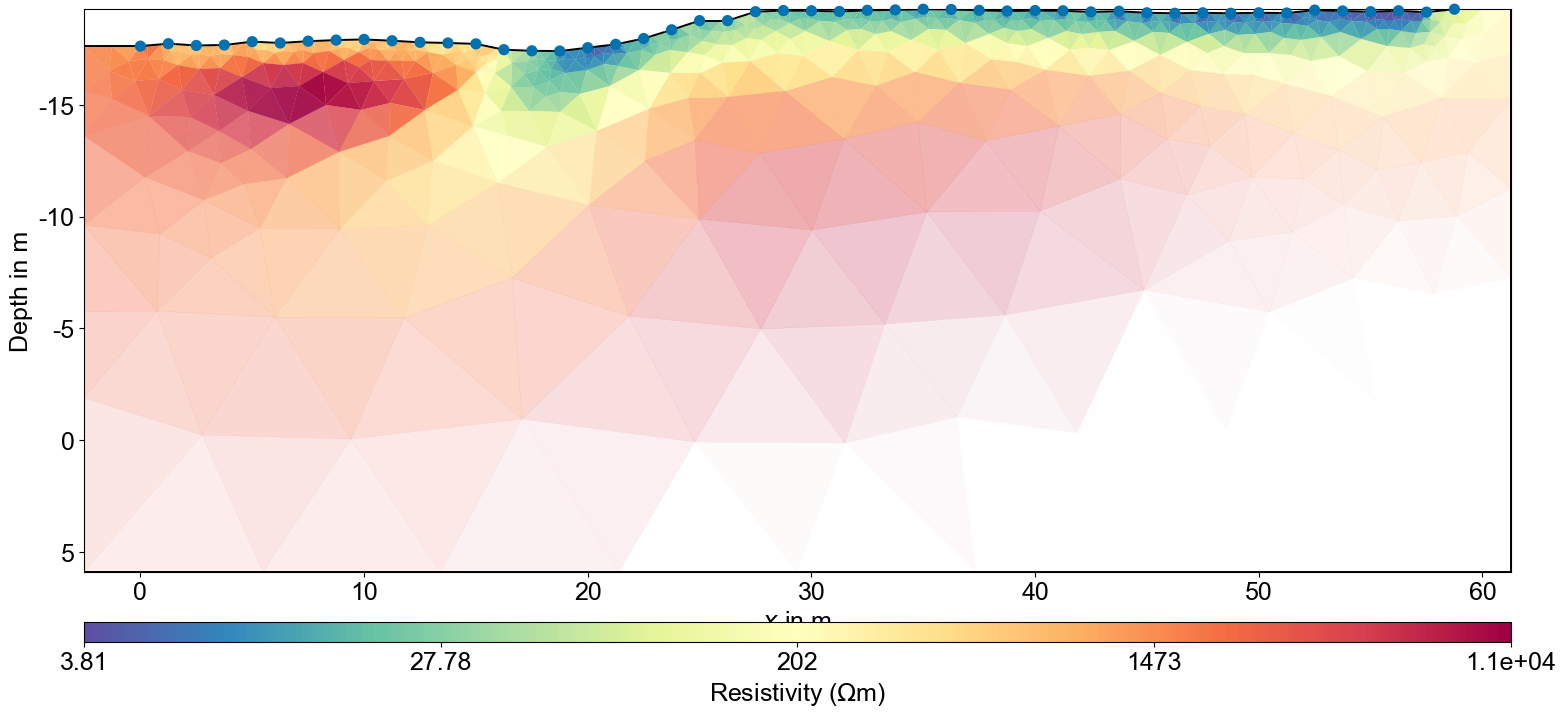

In [199]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2024june')

13/02/25 - 08:34:44 - pyGIMLi - INFO - Found 2 regions.
13/02/25 - 08:34:44 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/02/25 - 08:34:44 - pyGIMLi - INFO - Found 2 regions.
13/02/25 - 08:34:44 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/02/25 - 08:34:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/02/25 - 08:34:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/02/25 - 08:34:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2393 Cells: 4440 Boundaries: 3502
13/02/25 - 08:34:44 - pyGIMLi - INFO - Use median(data values)=104.305
13/02/25 - 08:34:44 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=104.305000/104.305000
13/02/25 - 08:34:44 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E2E1BD4E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E44FD6D90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E47035000>
min/max (data): 7.21/1140
min/max (error): 3%/3.25%
min/max (start model): 104/104
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1328.14
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  162.46 (dPhi = 87.54%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  100.24 (dPhi = 38.12%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   53.84 (dPhi = 45.37%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.91 (dPhi = 89.87%) lam: 2

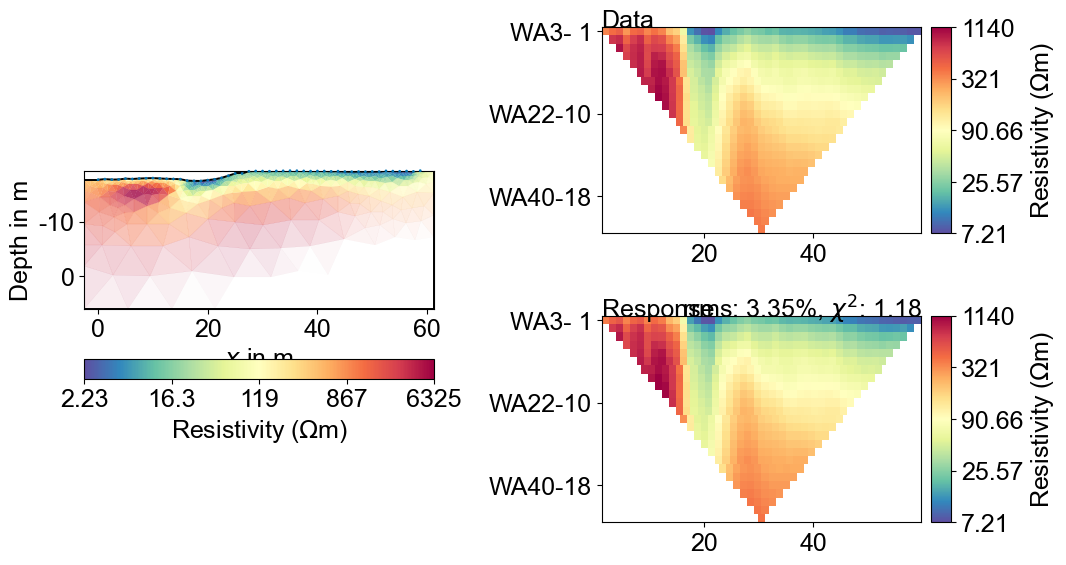

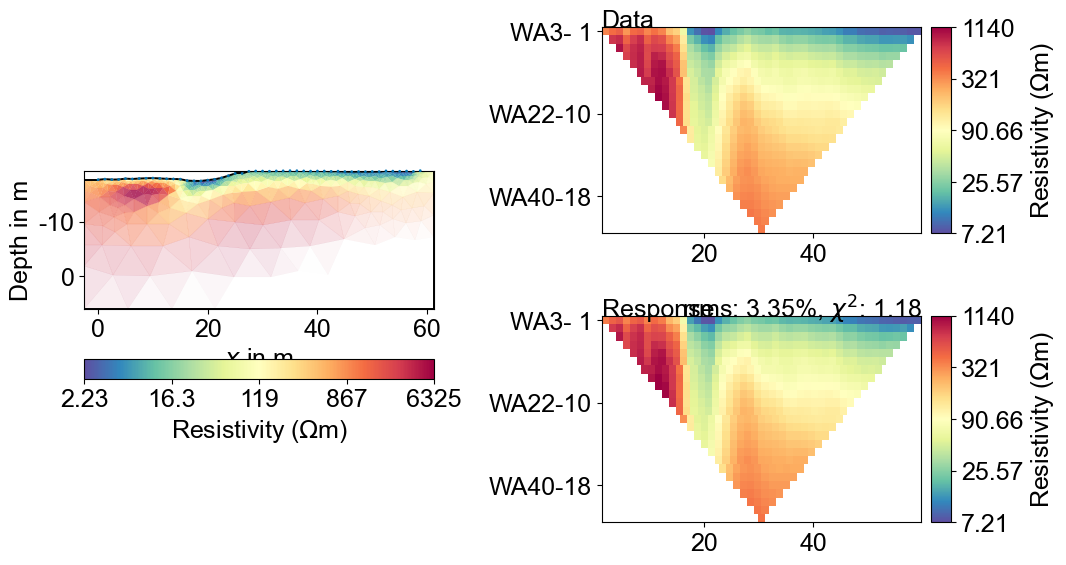

In [200]:
mgr = ert.ERTManager(kamik[2])
mgr.invert(kamik[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

13/02/25 - 08:36:31 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

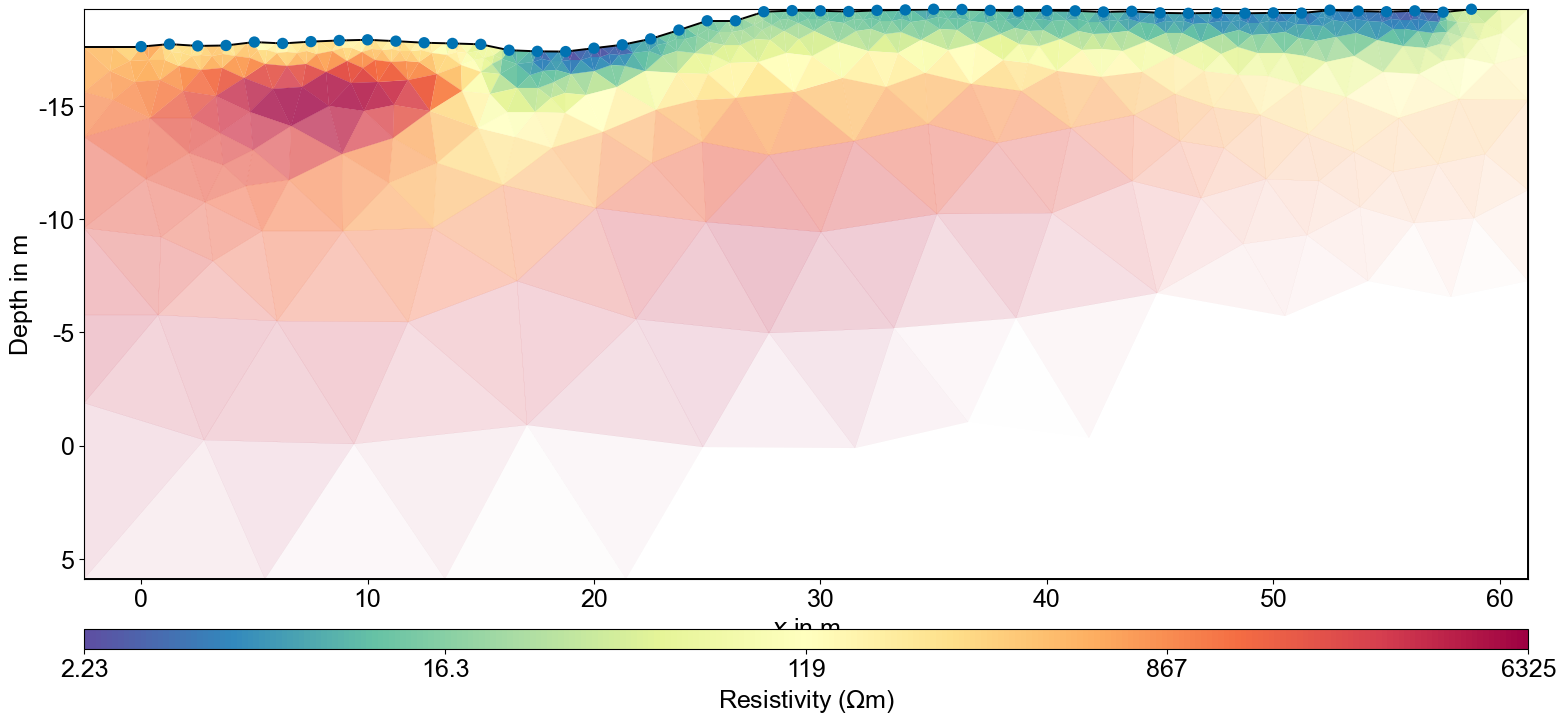

In [201]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2024august')

In [235]:
mesh_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity-pd.bms')
res_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity.vector')
cov_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity-cov.vector')

mesh_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity-pd.bms')
res_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity.vector')
cov_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity-cov.vector')

mesh_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-pd.bms')
res_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity.vector')
cov_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-cov.vector')

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\1448458396.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\1448458396.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\1448458396.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


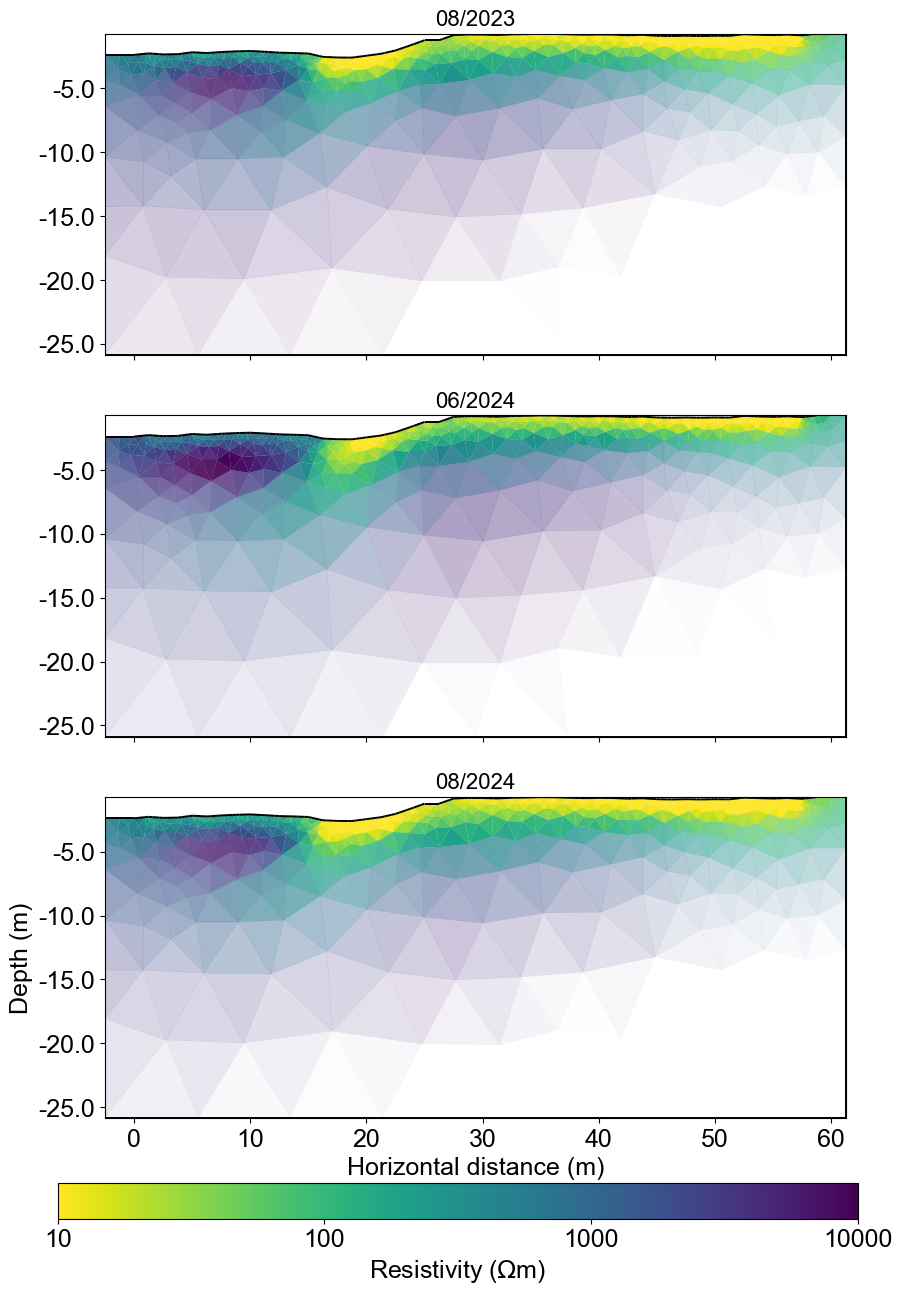

In [306]:
from matplotlib.ticker import LogLocator, LogFormatter

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.style.use('seaborn-v0_8-colorblind')
cMin=10
cMax=10000
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

pg.show(mesh_kamik2023, res_kamik2023, logScale=True, cMap="viridis_r", ax=ax[0], cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_kamik2023)
pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="viridis_r", ax=ax[1], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="viridis_r", ax=ax[2], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024august, sharex=True)

#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, -0.01, 0.8, 0.03])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=cMin, cMax=cMax, logScale=True, cMap="viridis_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')

ax[0].set_title('08/2023', fontsize=16)
ax[1].set_title('06/2024', fontsize=16)
ax[2].set_title('08/2024', fontsize=16)

ax[0].set_aspect(1.1)
ax[1].set_aspect(1.1)
ax[2].set_aspect(1.1)

current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks-20

ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[0].set_ylabel("")
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[2].set_ylabel("Depth (m)")
ax[2].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[1].set_ylabel("")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("Horizontal distance (m)")

plt.show()



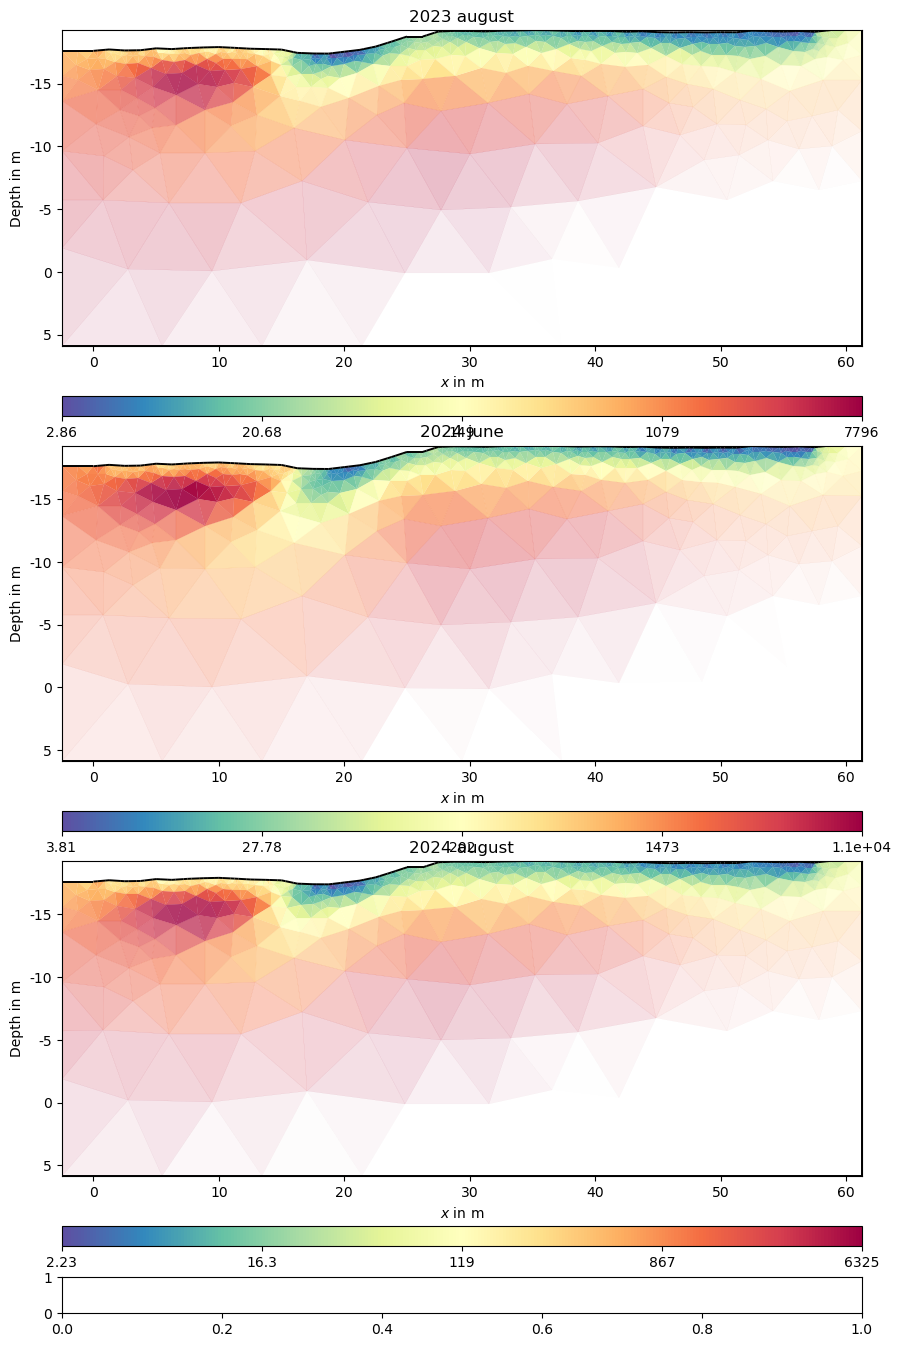

In [54]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(3, 1, figsize=(10, 18))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_kamik2023, res_kamik2023, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=True, coverage=cov_kamik2023, sharex=True)
pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=True, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=ax[2], colorBar=True, coverage=cov_kamik2024august, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('2023 august')
ax[1].set_title('2024 june')
ax[2].set_title('2024 august')




plt.show()

In [ ]:
from matplotlib.ticker import LogLocator, LogFormatter

baseline= mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
timestep1= mgr.invert (kamik[2], verbose=True, startModel=baseline, isReference=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
ratio = timestep1 / baseline
pg.show(mgr.paraDomain, ratio, cMin=0.5, cMax=2, cMap="bwr", logScale=True)

13/02/25 - 09:20:19 - pyGIMLi - INFO - Use median(data values)=124.4685
13/02/25 - 09:20:19 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=124.468500/124.468500


13/02/25 - 09:20:19 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E2E1BD4E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E44FD6D90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E34686490>
min/max (data): 9.19/1616
min/max (error): 3%/3.21%
min/max (start model): 124/124
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1400.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  180.48 (dPhi = 86.94%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   92.16 (dPhi = 49.10%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   19.51 (dPhi = 78.92%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.38 (dPhi = 92.70%) lam: 2

13/02/25 - 09:20:52 - pyGIMLi - INFO - Starting inversion.
13/02/25 - 09:20:52 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E2E1BD4E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E44FD6D90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E515C7760>
min/max (data): 7.21/1140
min/max (error): 3%/3.25%
min/max (start model): 0.95/2.3e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   52.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.20 (dPhi = 97.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.71 (dPhi = 39.03%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.71)                   #
################################################################################


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x27e310bebd0>)

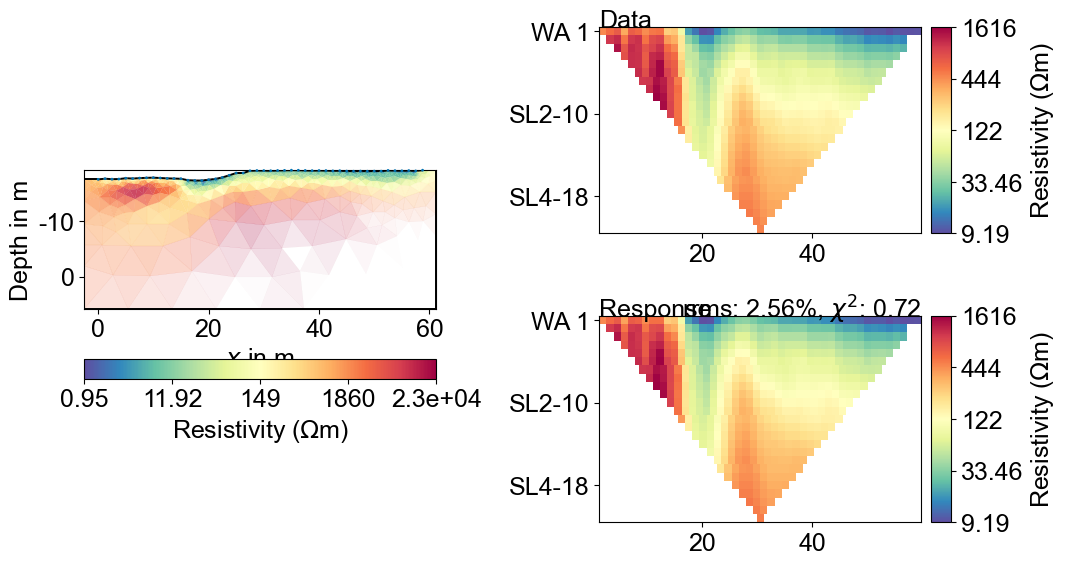

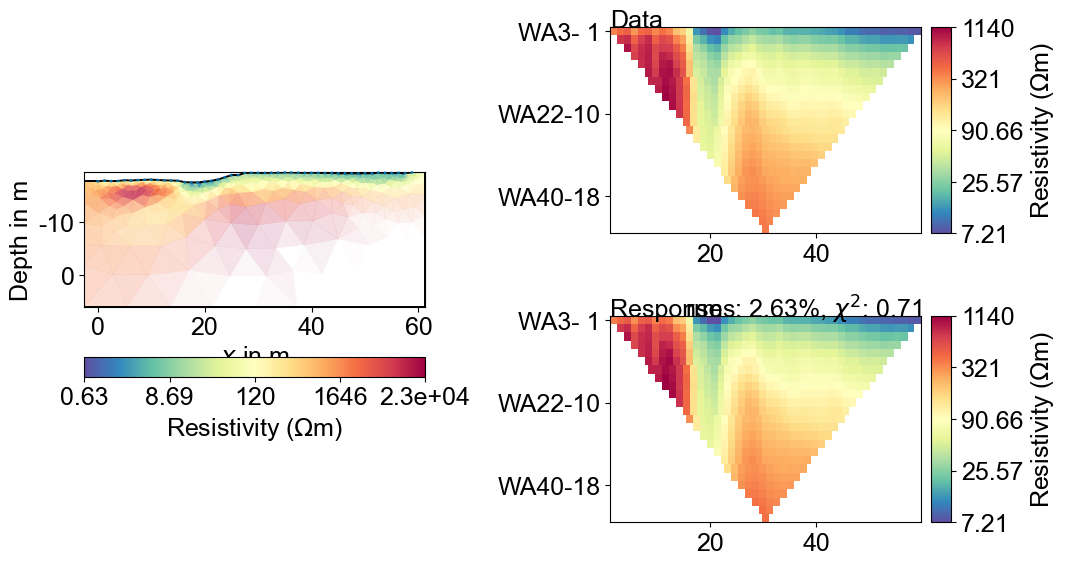

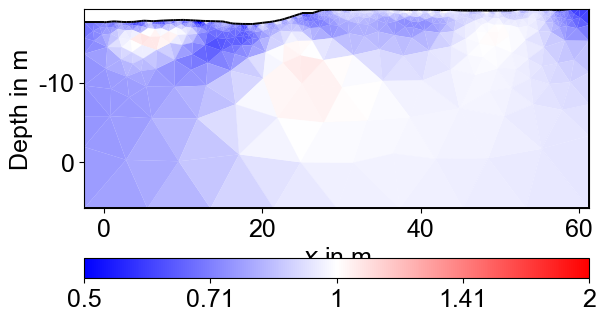

In [238]:
from matplotlib.ticker import LogLocator, LogFormatter

baseline= mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
timestep1= mgr.invert (kamik[2], verbose=True, startModel=baseline, isReference=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
#august 2024 to august 2023
ratio = timestep1 / baseline
pg.show(mgr.paraDomain, ratio, cMin=0.5, cMax=2, cMap="bwr", logScale=True)




13/02/25 - 08:43:37 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\275081914639861778


13/02/25 - 08:43:37 - pyGIMLi - INFO - Found 2 regions.
13/02/25 - 08:43:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/02/25 - 08:43:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/02/25 - 08:43:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/02/25 - 08:43:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1923 Cells: 3584 Boundaries: 2818
13/02/25 - 08:43:37 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E46CCC590>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E481CED90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E3384DB60>
min/max (data): 9.19/1616
min/max (error): 3%/1.0e+10%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  790.00
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  150.48 (dPhi = 80.83%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   77.36 (dPhi = 48.58%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   16.63 (dPhi = 78.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.13 (dPhi = 90.30%) lam

13/02/25 - 08:44:16 - pyGIMLi - INFO - Starting inversion.


chi² =    0.61 (dPhi = 32.69%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.61)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E46CCC590>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E481CED90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E3384D9A0>
min/max (data): 12.62/2638
min/max (error): 3%/1.0e+10%
min/max (start model): 3.15/3.4e+05
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  154.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   33.97 (dPhi = 77.77%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.46 (

13/02/25 - 08:44:51 - pyGIMLi - INFO - Starting inversion.


chi² =    1.28 (dPhi = -0.05%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = -0.05 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E46CCC590>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E481CED90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E3384DB60>
min/max (data): 7.21/1140
min/max (error): 3%/1.0e+10%
min/max (start model): 3.15/3.4e+05
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   26.65
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.11 (dPhi = 94.04%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.66 (dPh

<Figure size 500x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

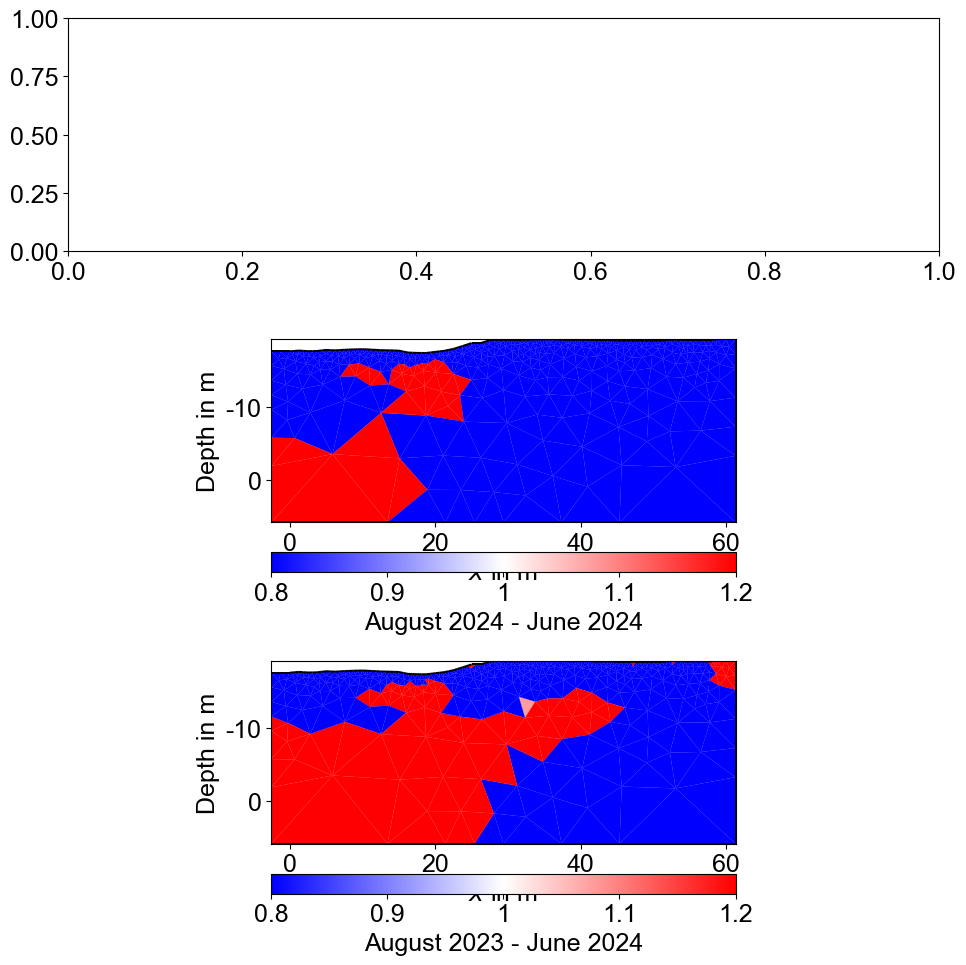

In [205]:
from matplotlib.ticker import LogLocator, LogFormatter



#fig, ax = plt.subplots(3, 1, figsize=(10, 18))  

timeposs=['10/08/2023 12:00','25/06/2024 12:00','16/08/2024 12:00']

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

tl = ert.TimelapseERT(kamik, times=timepos)
 
tl.invert(isReference=False, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.2)
tl.generateDataPDF()  # pseudosections
tl.generateModelPDF() # inversions
tl.generateRatioPDF()


fig, zx = plt.subplots(3,1,figsize=(10,10) ) 
zx=zx.ravel()
arg= dict( cMap="bwr", cMin=0.8, cMax=1.2) 


#pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024june, sharex=True)
#pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
#pg.show(mgr.paraDomain, ratio, cMin=0.5, cMax=2, cMap="bwr", logScale=True)

zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



plt.show()



C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\834944608.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\834944608.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\834944608.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


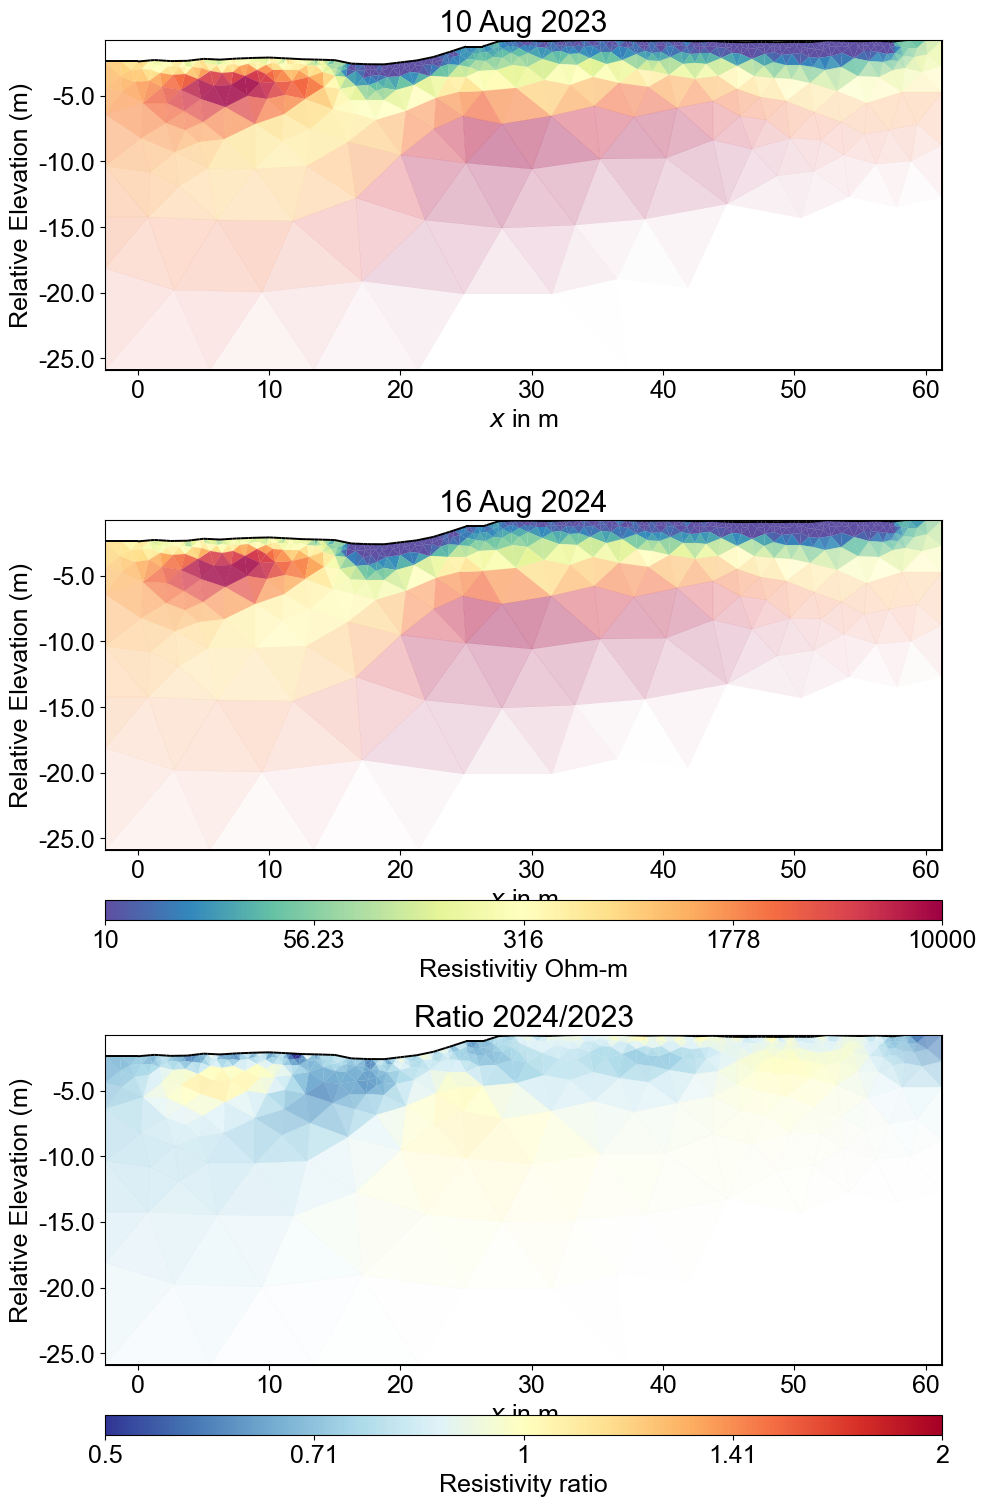

In [239]:
fig, zx = plt.subplots(3,1,figsize=(10,16) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, baseline, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, timestep1, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=True, label='Resistivitiy Ohm-m', cMin=10, cMax=10000,  coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio, ax=zx[2], cMin=0.5, cMax=2, cMap="RdYlBu_r", logScale=True, label='Resistivity ratio', coverage=cov_kamik2023)


#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)

zx[0].set_title('10 Aug 2023')
zx[1].set_title('16 Aug 2024')
zx[2].set_title('Ratio 2024/2023')

# Get the current y-ticks and subtract 17 to show relative elevation
current_ticks = zx[2].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)):
    zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    zx[i].set_ylabel("Relative Elevation (m)")
#zx[2].set_ylim([0, 25])




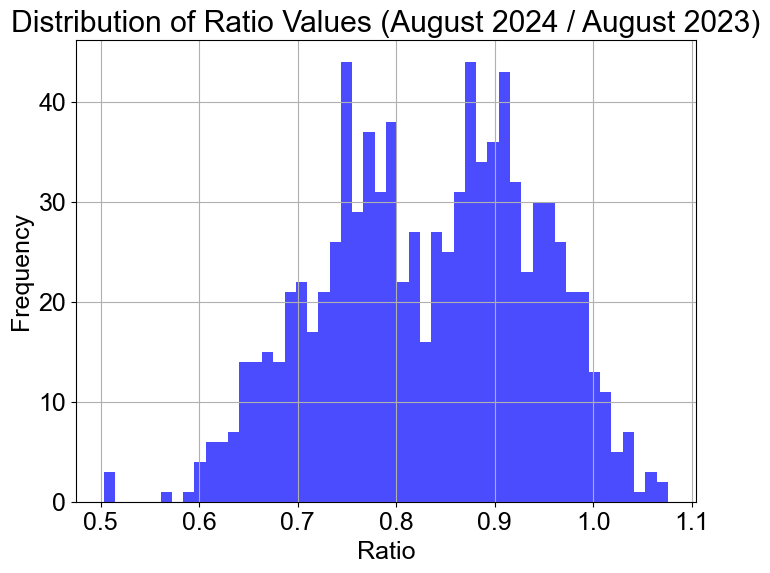

Percentage of values below 1: 96.00%


In [295]:
ratio_flat = ratio.array().flatten()
plt.figure(figsize=(8, 6))
plt.hist(ratio_flat, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Ratio Values (August 2024 / August 2023)')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
percentage_below_1 = np.sum(ratio_flat < 1) / len(ratio_flat) * 100
print(f"Percentage of values below 1: {percentage_below_1:.2f}%")


13/02/25 - 09:22:51 - pyGIMLi - INFO - Starting inversion.


13/02/25 - 09:22:51 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027E2E1BD4E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027E44FD6D90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000027E2F910B30>
min/max (data): 12.62/2638
min/max (error): 3%/3.16%
min/max (start model): 0.95/2.3e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  297.17
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.84 (dPhi = 96.88%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.17 (dPhi = 83.51%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.89 (dPhi = 18.72%) lam: 20.0


################################################################################
#                  Abort criterion reached: 

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x27e314af6d0>)

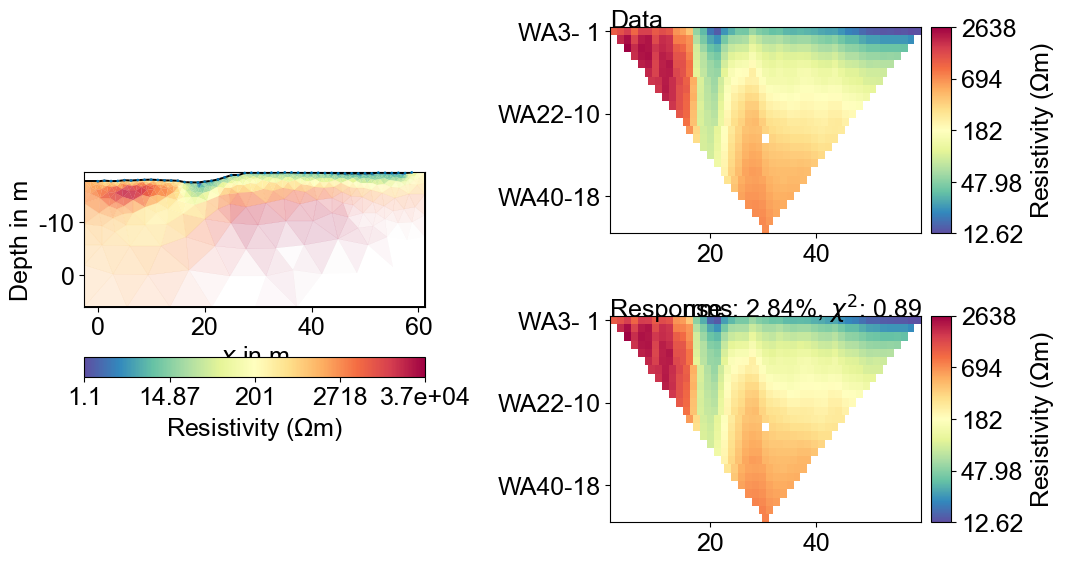

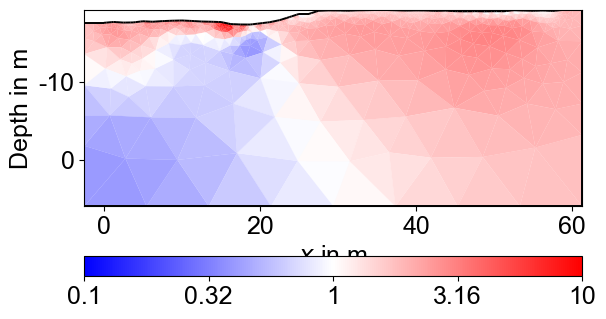

In [241]:
timestep0= mgr.invert (kamik[1], verbose=True, startModel=baseline, isReference=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
ratio1 = timestep0 / baseline
pg.show(mgr.paraDomain, ratio1, cMin=0.1, cMax=10, cMap="bwr", logScale=True)

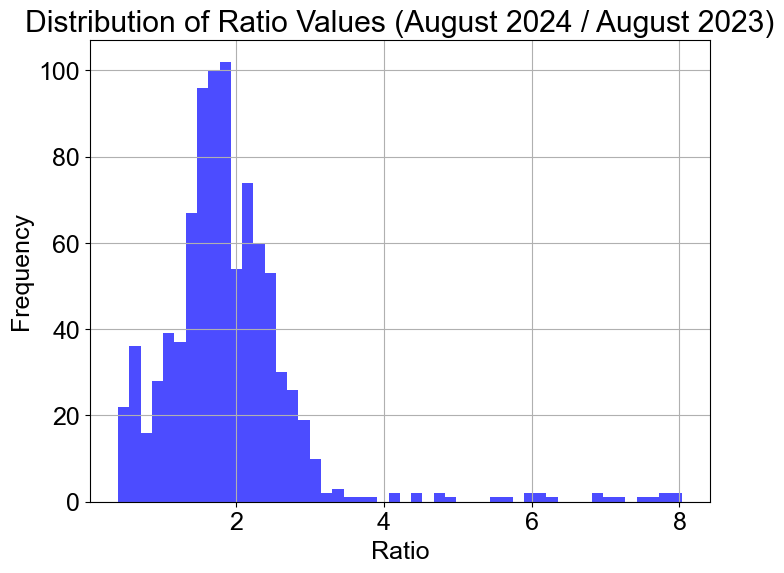

In [242]:
ratio1_flat = ratio1.array().flatten()
plt.figure(figsize=(8, 6))
plt.hist(ratio1_flat, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Ratio Values (August 2024 / August 2023)')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\2763334105.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\2763334105.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\2763334105.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


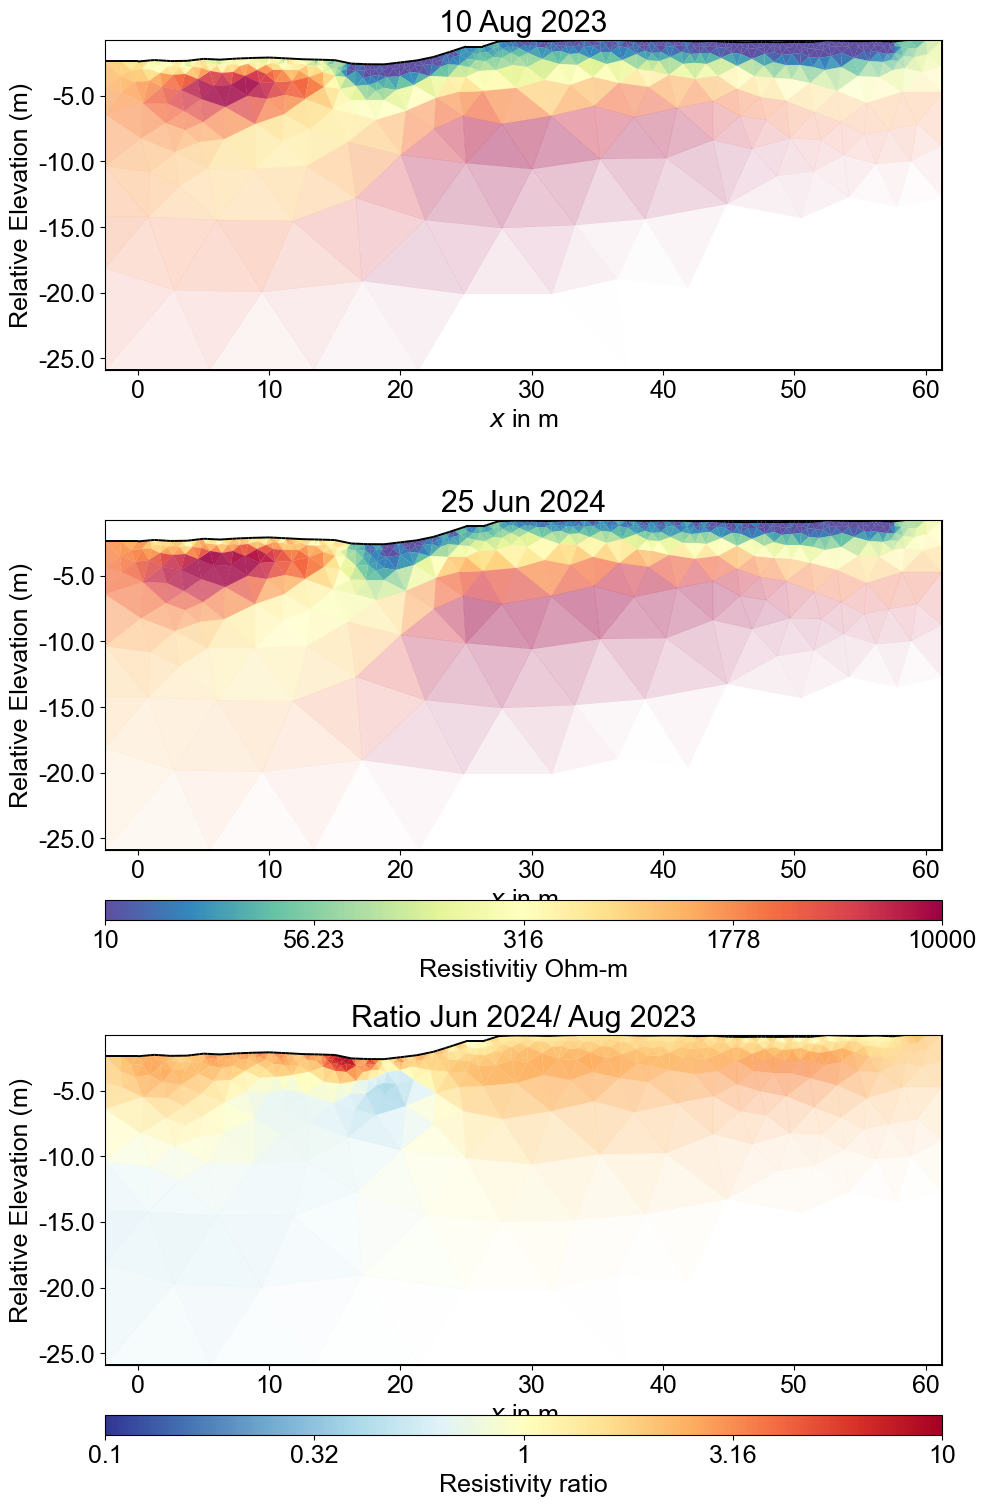

In [243]:
fig, zx = plt.subplots(3,1,figsize=(10,16) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, baseline, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, timestep0, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=True, label='Resistivitiy Ohm-m', cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio1, ax=zx[2], cMin=0.1, cMax=10, cMap="RdYlBu_r", logScale=True, label='Resistivity ratio', coverage=cov_kamik2023)

zx[0].set_title('10 Aug 2023')
zx[1].set_title('25 Jun 2024')
zx[2].set_title('Ratio Jun 2024/ Aug 2023')

# Get the current y-ticks and subtract 17 to show relative elevation
current_ticks = zx[2].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)):
    zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    zx[i].set_ylabel("Relative Elevation (m)")

#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



plt.show()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x27e3b28d490>)

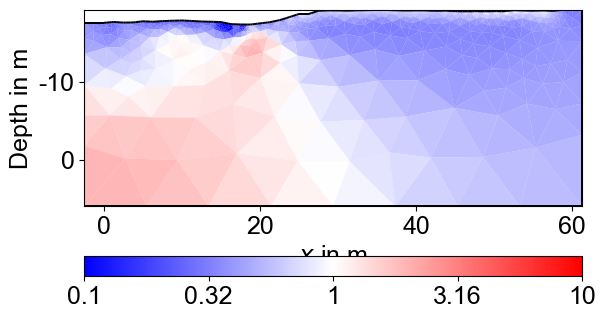

In [244]:
# august 2024 to june 2024
ratio2 = timestep1 / timestep0
pg.show(mgr.paraDomain, ratio2, cMin=0.1, cMax=10, cMap="bwr", logScale=True)

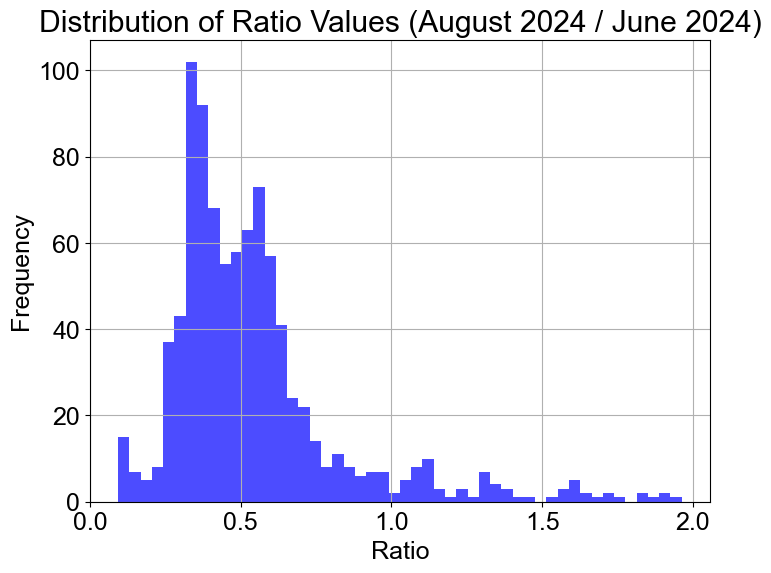

Percentage of values below 1: 92.34%


In [296]:
ratio2_flat = ratio2.array().flatten()
plt.figure(figsize=(8, 6))
plt.hist(ratio2_flat, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Ratio Values (August 2024 / June 2024)')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
percentage_below_1 = np.sum(ratio2_flat < 1) / len(ratio2_flat) * 100
print(f"Percentage of values below 1: {percentage_below_1:.2f}%")

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\1657236796.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\1657236796.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\1657236796.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


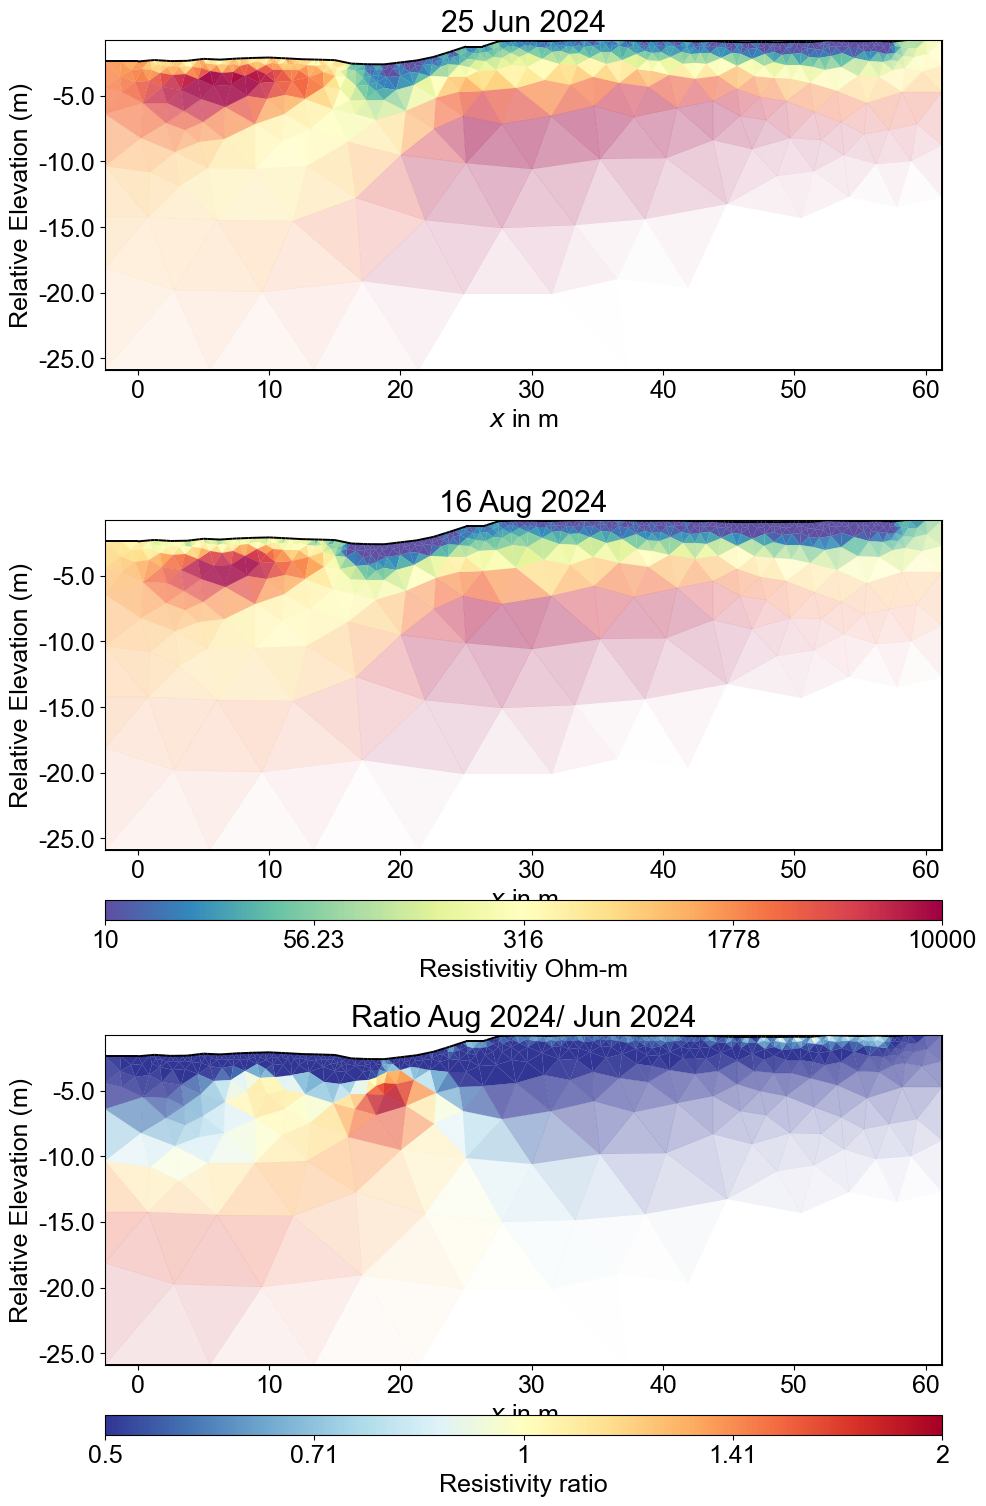

In [302]:
fig, zx = plt.subplots(3,1,figsize=(10,16) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, timestep0, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, timestep1, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=True, label='Resistivitiy Ohm-m', cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio2, ax=zx[2], cMin=0.5, cMax=2, cMap="RdYlBu_r", logScale=True, label='Resistivity ratio', coverage=cov_kamik2023)

zx[0].set_title('25 Jun 2024')
zx[1].set_title('16 Aug 2024')
zx[2].set_title('Ratio Aug 2024/ Jun 2024')

# Get the current y-ticks and subtract 17 to show relative elevation
current_ticks = zx[2].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)):
    zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    zx[i].set_ylabel("Relative Elevation (m)")

#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x27e25c60c50>)

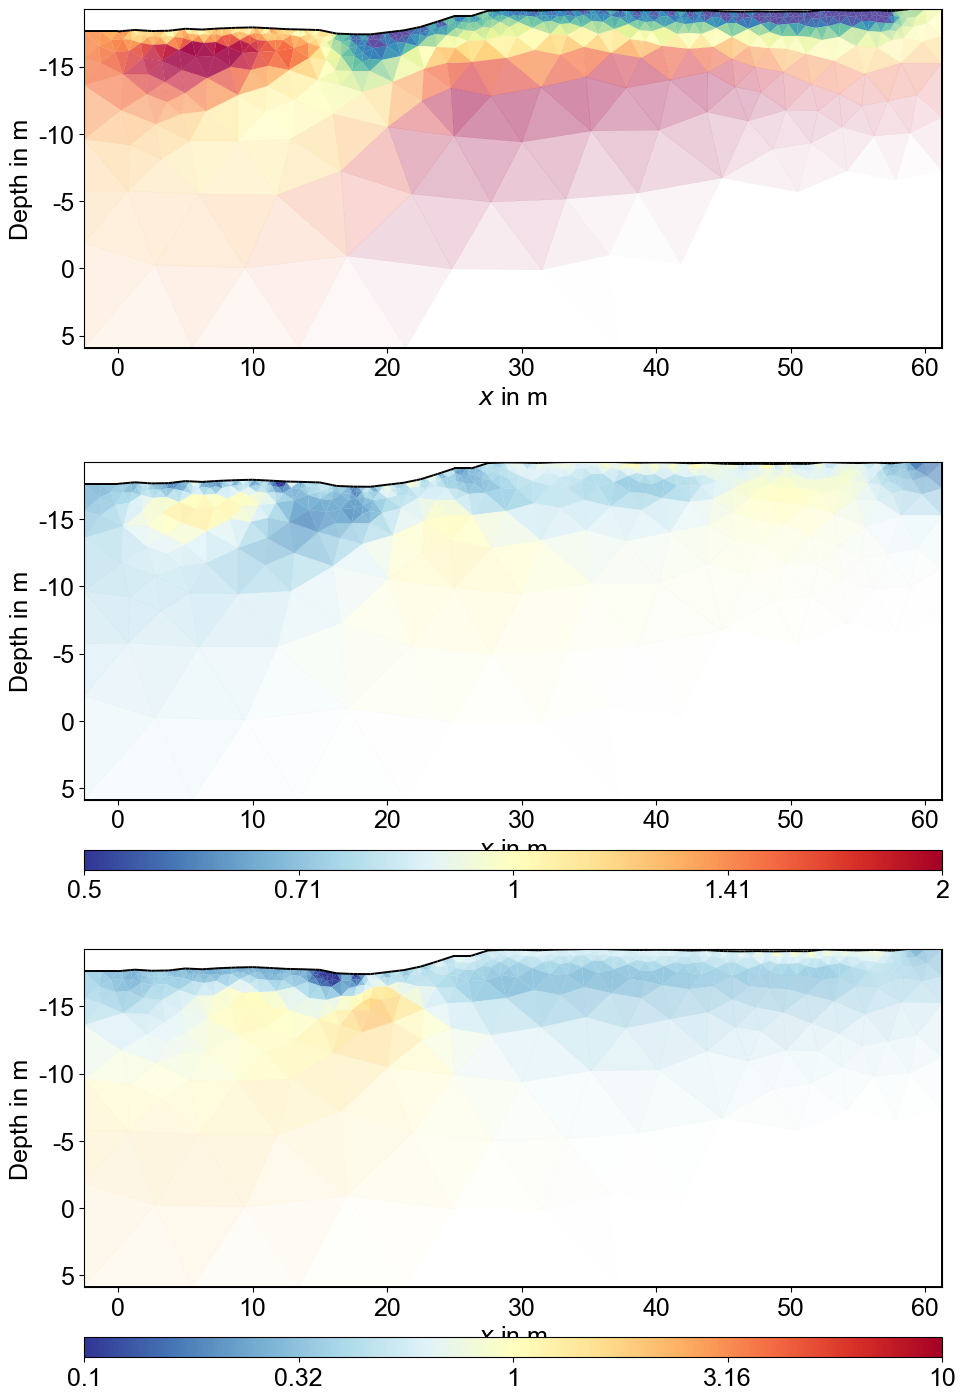

In [303]:
fig, zx = plt.subplots(3,1,figsize=(10,15) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, timestep0, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, ratio, ax=zx[1], cMin=0.5, cMax=2, cMap="RdYlBu_r", logScale=True, coverage=cov_kamik2023)
pg.show(mgr.paraDomain, ratio2, ax=zx[2], cMin=0.1, cMax=10, cMap="RdYlBu_r", logScale=True, coverage=cov_kamik2023)


#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\4003519161.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\4003519161.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


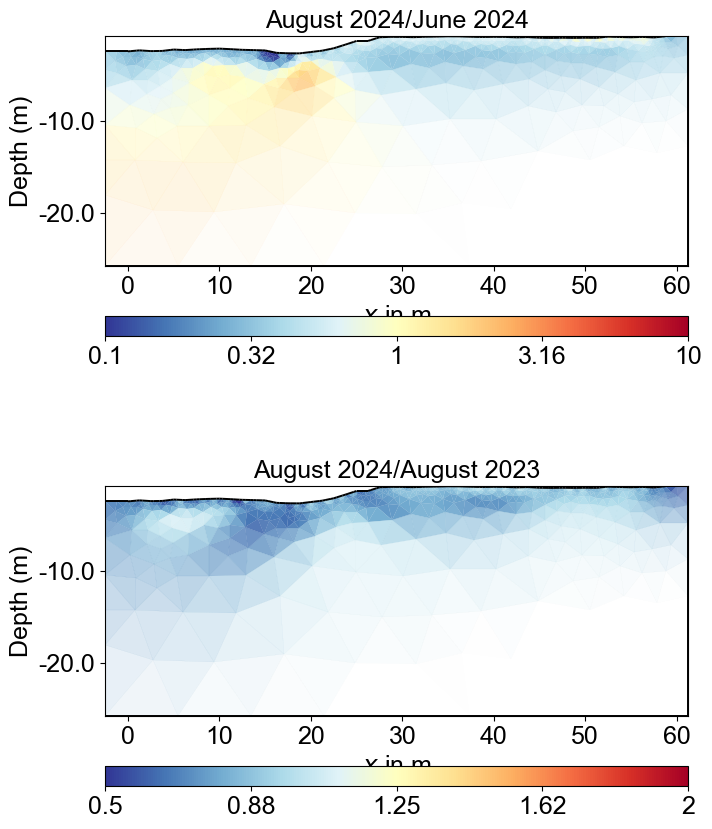

In [308]:
from matplotlib.ticker import LogLocator, LogFormatter

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.style.use('seaborn-v0_8-colorblind')

fig, ax = plt.subplots(2, 1, figsize=(30, 10))


pg.show(mgr.paraDomain, ratio,  ax=ax[1], cMin=0.5, cMax=2, cMap="RdYlBu_r", coverage=cov_kamik2023)
pg.show(mgr.paraDomain, ratio2, ax=ax[0], cMin=0.1, cMax=10, logScale=True,cMap="RdYlBu_r", coverage=cov_kamik2023)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.5) 



#cax.set_xlabel('Resistivity ($\Omega$m)')

ax[1].set_title('August 2024/August 2023', fontsize=18)
#ax[1].set_title('Early summer to late summer', fontsize=16)
ax[0].set_title('August 2024/June 2024', fontsize=18)

#ax[0].set_aspect(1.1)
#ax[1].set_aspect(1.1)


current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks-20

ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[1].set_ylabel("Depth (m)")
ax[0].set_ylabel("Depth (m)")
#ax[0].set_xlabel("Horizontal distance (m)")
#ax[1].set_xlabel("Horizontal distance (m)")

plt.show()



C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\3191545474.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\3191545474.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35852\3191545474.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


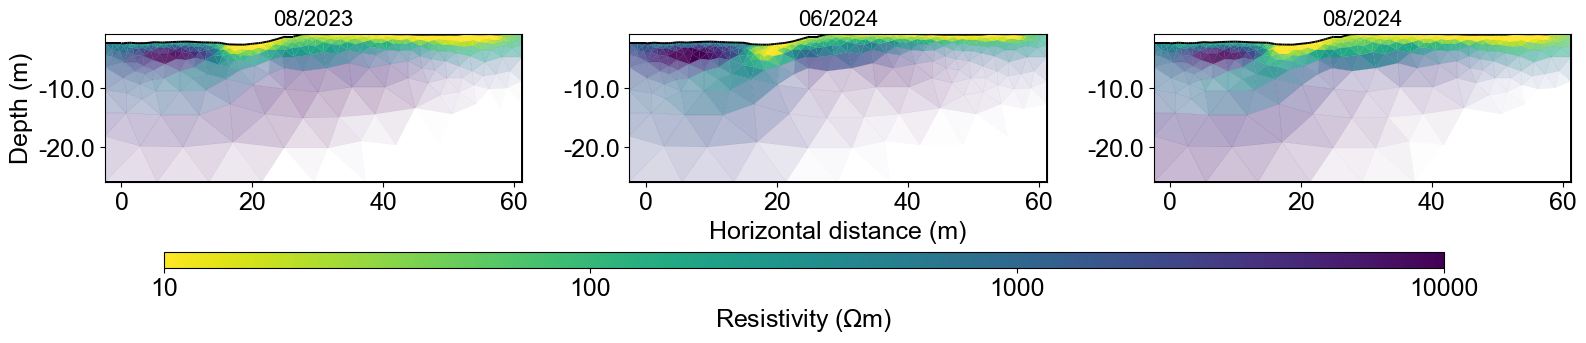

In [160]:
from matplotlib.ticker import LogLocator, LogFormatter

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.style.use('seaborn-v0_8-colorblind')
cMin=10
cMax=10000
fig, ax = plt.subplots(1, 3, figsize=(16, 8), sharex=True)

pg.show(mesh_kamik2023, res_kamik2023, logScale=True, cMap="viridis_r", ax=ax[0], cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_kamik2023)
pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="viridis_r", ax=ax[1], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="viridis_r", ax=ax[2], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024august, sharex=True)

#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.3, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=cMin, cMax=cMax, logScale=True, cMap="viridis_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')

ax[0].set_title('08/2023', fontsize=16)
ax[1].set_title('06/2024', fontsize=16)
ax[2].set_title('08/2024', fontsize=16)

ax[0].set_aspect(0.9)
ax[1].set_aspect(0.9)
ax[2].set_aspect(0.9)

current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks-20

ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])

ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[0].set_ylabel("Depth (m)")
ax[2].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[2].set_ylabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")
ax[0].set_xlabel("")
ax[1].set_xlabel("Horizontal distance (m)")
ax[1].set_ylabel("")
plt.show()



(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x27e2b562350>)

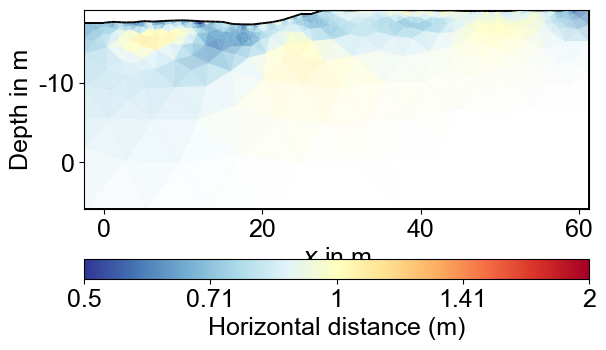

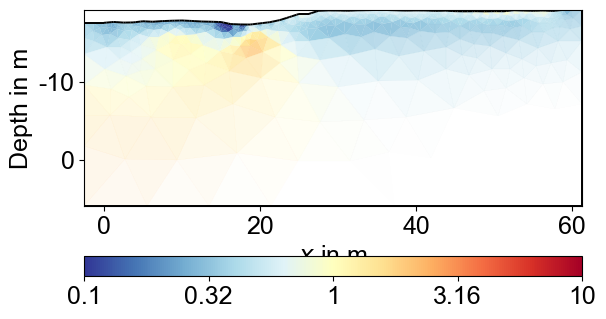

In [267]:
pg.show(mgr.paraDomain, ratio,cMin=0.5, cMax=2, logScale=True, cMap="RdYlBu_r", coverage=cov_kamik2023)
pg.show(mgr.paraDomain, ratio2, cMin=0.1, cMax=10, logScale=True,cMap="RdYlBu_r", coverage=cov_kamik2023)

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x27e3051ca50>)

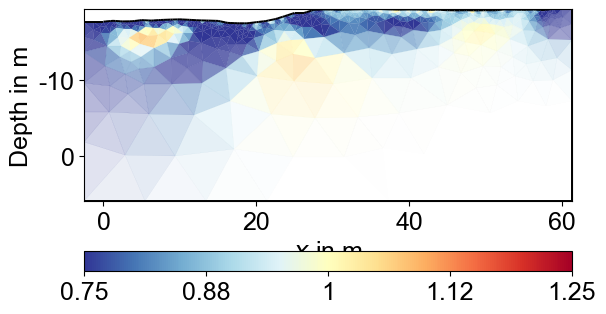

In [301]:
pg.show(mgr.paraDomain, ratio, cMin=0.75, cMax=1.25, cMap="RdYlBu_r", coverage=cov_kamik2023)
